<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Applicazione dei ensamble models su un set di immagini**

Sei pronto per divertirti con le immagini? :D

Carica i dati MNIST (https://www.tensorflow.org/datasets/catalog/mnist) e suddividili in un set di train, un set di validation e un set di test (ad esempio, usa 50.000 istanze per il train, 10.000 per la il validation e 10.000 per il test).
Quindi addestra vari classificatori, per esempio un classificatore Random Forest, quindi prova a combinarli con un metodo Ensamble, utilizzando più metodi di ensampling (hard/soft voting)

Una volta identificato, provalo sul set di test, ovvero sulla porzione di dati mai visti dai modelli.

*Quanto meglio funziona rispetto ai singoli classificatori?*
Giustifica la risposta utilizzando le metriche di valutazione della classificazione.

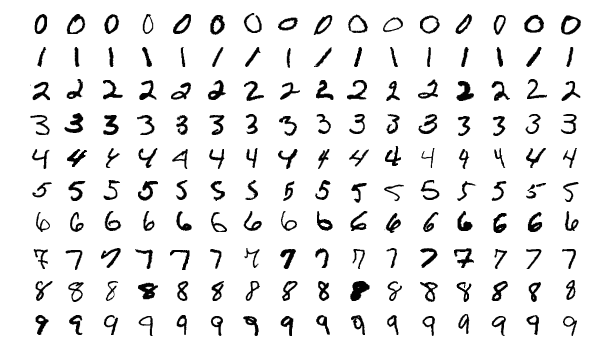

In [80]:
from IPython import display
display.Image('MnistExamples.png')

In [81]:
#Load Modules

import numpy as np
import statistics as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn import datasets
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import fetch_openml

import warnings
warnings.filterwarnings('ignore')

In [82]:
#Import mnist dataset

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [83]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [84]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [85]:
df_mnist = pd.DataFrame(data=mnist.data, 
                  columns=mnist.feature_names)
pd.set_option('display.max_columns', None)
df_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pix

In [86]:
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [87]:
X = mnist.data
y = mnist.target

### Class imbalance and Downsampling

In [88]:
classe = [None] * 10
n_classe = [None] * 10

for i in range(10):
    classe[i] = np.where(y == i)[0] 
    n_classe[i] = len(classe[i])
    print("Number of elements in class {}: {}".format(i, n_classe[i]))

Number of elements in class 0: 6903
Number of elements in class 1: 7877
Number of elements in class 2: 6990
Number of elements in class 3: 7141
Number of elements in class 4: 6824
Number of elements in class 5: 6313
Number of elements in class 6: 6876
Number of elements in class 7: 7293
Number of elements in class 8: 6825
Number of elements in class 9: 6958


In [89]:
np.random.seed(42)

classe_downsampled = [None] * 10

for i in range(10):

    classe_downsampled[i] = np.random.choice(classe[i], size=3000, replace=False)
    print("New Number of elements in class {}: {}".format(i, len(classe_downsampled[i])))

New Number of elements in class 0: 3000
New Number of elements in class 1: 3000
New Number of elements in class 2: 3000
New Number of elements in class 3: 3000
New Number of elements in class 4: 3000
New Number of elements in class 5: 3000
New Number of elements in class 6: 3000
New Number of elements in class 7: 3000
New Number of elements in class 8: 3000
New Number of elements in class 9: 3000


In [90]:
X_balanced = pd.DataFrame()
y_balanced = np.array([])

for i in range(10): 
    X_balanced = pd.concat([X_balanced, df_mnist.iloc[classe_downsampled[i]]], axis=0)
    y_balanced = np.concatenate([y_balanced, y[classe_downsampled[i]]])

In [91]:
#Train Test Split

X_trainval, X_test, y_trainval, y_test = train_test_split(X_balanced,y_balanced, test_size = 0.15, stratify=y_balanced, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size = 0.15, stratify=y_trainval, random_state=42)

### Model Selection

#### KNN Classifier

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_knn)}")
knn_f1 = f1_score(y_val, y_pred_knn, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       382
         1.0       0.93      1.00      0.96       382
         2.0       0.98      0.94      0.96       383
         3.0       0.96      0.95      0.95       383
         4.0       0.99      0.96      0.97       383
         5.0       0.96      0.95      0.95       382
         6.0       0.96      0.97      0.97       383
         7.0       0.93      0.96      0.95       382
         8.0       0.99      0.90      0.94       382
         9.0       0.94      0.95      0.95       383

    accuracy                           0.96      3825
   macro avg       0.96      0.96      0.96      3825
weighted avg       0.96      0.96      0.96      3825



#### Bagging Meta Classifier

In [93]:
bc = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                         n_estimators=25, max_samples=0.8, random_state=1)
bc.fit(X_train,y_train)
y_pred_bc = bc.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_bc)}")
bc_f1 = f1_score(y_val, y_pred_bc, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       382
         1.0       0.94      1.00      0.97       382
         2.0       0.99      0.94      0.96       383
         3.0       0.96      0.96      0.96       383
         4.0       0.99      0.97      0.98       383
         5.0       0.95      0.95      0.95       382
         6.0       0.97      0.98      0.97       383
         7.0       0.94      0.96      0.95       382
         8.0       0.99      0.91      0.95       382
         9.0       0.94      0.96      0.95       383

    accuracy                           0.96      3825
   macro avg       0.96      0.96      0.96      3825
weighted avg       0.96      0.96      0.96      3825



#### Random Forest Classifier

In [94]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_rfc)}")
rfc_f1 = f1_score(y_val, y_pred_rfc, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       382
         1.0       0.98      0.99      0.99       382
         2.0       0.98      0.94      0.96       383
         3.0       0.95      0.94      0.95       383
         4.0       0.96      0.97      0.96       383
         5.0       0.95      0.96      0.95       382
         6.0       0.95      0.97      0.96       383
         7.0       0.96      0.95      0.96       382
         8.0       0.95      0.95      0.95       382
         9.0       0.94      0.94      0.94       383

    accuracy                           0.96      3825
   macro avg       0.96      0.96      0.96      3825
weighted avg       0.96      0.96      0.96      3825



#### XGBoost Classifier

In [95]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_xgb)}")
xgb_f1 = f1_score(y_val, y_pred_xgb, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       382
         1.0       0.98      0.99      0.98       382
         2.0       0.97      0.95      0.96       383
         3.0       0.96      0.95      0.96       383
         4.0       0.97      0.97      0.97       383
         5.0       0.97      0.97      0.97       382
         6.0       0.97      0.98      0.98       383
         7.0       0.96      0.95      0.95       382
         8.0       0.95      0.96      0.95       382
         9.0       0.95      0.95      0.95       383

    accuracy                           0.97      3825
   macro avg       0.97      0.97      0.97      3825
weighted avg       0.97      0.97      0.97      3825



#### Voting Classifier

In [96]:
#Voting Classifier - hard voting

vc_hard = VotingClassifier(estimators=[('KNN', knn), ('rfc', rfc), ('xgb', xgb), ('bc', bc)], voting='hard')
vc_hard.fit(X_train,y_train)
y_pred_vc_hard = vc_hard.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_vc_hard)}")
vch_f1 = f1_score(y_val, y_pred_vc_hard, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       382
         1.0       0.94      1.00      0.97       382
         2.0       0.98      0.96      0.97       383
         3.0       0.95      0.96      0.96       383
         4.0       0.98      0.98      0.98       383
         5.0       0.96      0.96      0.96       382
         6.0       0.97      0.97      0.97       383
         7.0       0.96      0.96      0.96       382
         8.0       0.99      0.91      0.95       382
         9.0       0.97      0.95      0.96       383

    accuracy                           0.97      3825
   macro avg       0.97      0.97      0.97      3825
weighted avg       0.97      0.97      0.97      3825



In [97]:
#Voting Classifier - soft voting

vc_soft = VotingClassifier(estimators=[('KNN', knn), ('rfc', rfc), ('xgb', xgb), ('bc', bc)], voting='soft')
vc_soft.fit(X_train,y_train)
y_pred_vc_soft = vc_soft.predict(X_val)
print(f"Classification report: \n{classification_report(y_val, y_pred_vc_soft)}")
vcs_f1 = f1_score(y_val, y_pred_vc_soft, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       382
         1.0       0.95      0.99      0.97       382
         2.0       0.98      0.96      0.97       383
         3.0       0.97      0.96      0.96       383
         4.0       0.99      0.97      0.98       383
         5.0       0.97      0.97      0.97       382
         6.0       0.98      0.99      0.98       383
         7.0       0.96      0.97      0.96       382
         8.0       0.98      0.94      0.96       382
         9.0       0.96      0.96      0.96       383

    accuracy                           0.97      3825
   macro avg       0.97      0.97      0.97      3825
weighted avg       0.97      0.97      0.97      3825



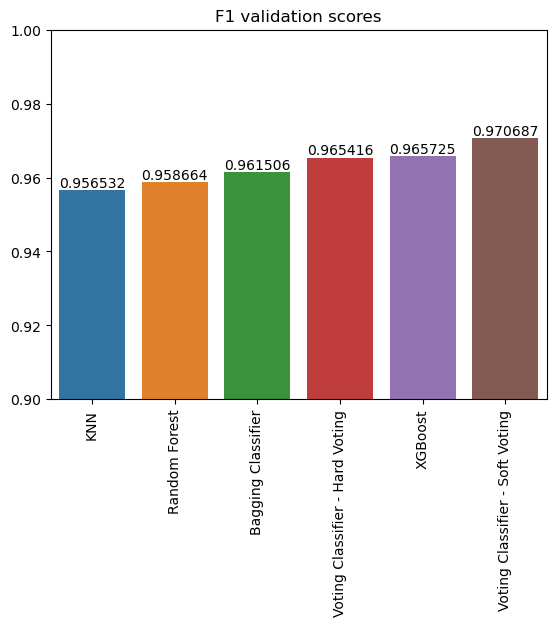

In [98]:
classifier = ['Voting Classifier - Hard Voting', 'Voting Classifier - Soft Voting', 'KNN','Random Forest', 'XGBoost', 'Bagging Classifier']
f1 = [vch_f1, vcs_f1, knn_f1, rfc_f1, xgb_f1, bc_f1]

df = pd.DataFrame({"Classifier": classifier,
                  "F1_score": f1})
# Plot Bar chart

ax = sns.barplot(classifier,f1, order=df.sort_values('F1_score').Classifier)

plt.tick_params(axis='x', labelrotation=90)
plt.title('F1 validation scores')
plt.ylim(0.90, 1.0)

ax.bar_label(ax.containers[0])

# Display graph

plt.show()

### Testing

In [99]:
#Voting Classifier - soft voting

vc_soft = VotingClassifier(estimators=[('KNN', knn), ('rfc', rfc), ('xgb', xgb)], voting='soft')
vc_soft.fit(X_trainval,y_trainval)
y_pred = vc_soft.predict(X_test)
print(f"Classification report: \n{classification_report(y_test, y_pred)}")
vcs_f1 = f1_score(y_test, y_pred, average="weighted")

Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       450
         1.0       0.98      0.99      0.99       450
         2.0       0.99      0.95      0.97       450
         3.0       0.98      0.97      0.97       450
         4.0       0.98      0.97      0.98       450
         5.0       0.99      0.98      0.98       450
         6.0       0.97      0.99      0.98       450
         7.0       0.97      0.98      0.97       450
         8.0       0.98      0.98      0.98       450
         9.0       0.95      0.97      0.96       450

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



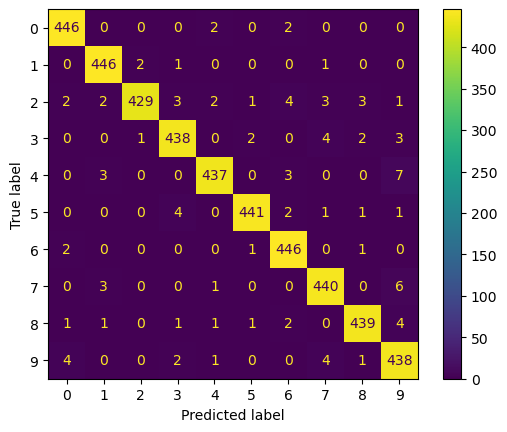

In [100]:
#Create and plot confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0','1','2','3','4','5','6','7','8','9'])
cm_display.plot()
plt.show()